In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import logging

tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 10

# 载入 MNIST 数据集
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 缩放数据
train_images = train_images / 255.0
test_images = test_images / 255.0

In [2]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu',
                       kernel_initializer='glorot_normal',
                       bias_initializer='zeros'),
    keras.layers.Dense(784, activation='sigmoid',
                       kernel_initializer='glorot_normal',
                       bias_initializer='zeros'),
    keras.layers.Reshape((28, 28))
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(train_images, train_images,
                    validation_data=(test_images, test_images),
                    epochs=EPOCHS, batch_size=64, verbose=2, shuffle=True)

Epoch 1/10
938/938 - 2s - loss: 0.1617 - mean_absolute_error: 0.0849 - val_loss: 0.1074 - val_mean_absolute_error: 0.0466 - 2s/epoch - 2ms/step
Epoch 2/10
938/938 - 1s - loss: 0.0953 - mean_absolute_error: 0.0373 - val_loss: 0.0853 - val_mean_absolute_error: 0.0296 - 1s/epoch - 2ms/step
Epoch 3/10
938/938 - 1s - loss: 0.0818 - mean_absolute_error: 0.0264 - val_loss: 0.0780 - val_mean_absolute_error: 0.0233 - 1s/epoch - 2ms/step
Epoch 4/10
938/938 - 1s - loss: 0.0774 - mean_absolute_error: 0.0225 - val_loss: 0.0755 - val_mean_absolute_error: 0.0210 - 1s/epoch - 2ms/step
Epoch 5/10
938/938 - 1s - loss: 0.0757 - mean_absolute_error: 0.0209 - val_loss: 0.0745 - val_mean_absolute_error: 0.0201 - 1s/epoch - 2ms/step
Epoch 6/10
938/938 - 2s - loss: 0.0749 - mean_absolute_error: 0.0202 - val_loss: 0.0740 - val_mean_absolute_error: 0.0196 - 2s/epoch - 2ms/step
Epoch 7/10
938/938 - 1s - loss: 0.0744 - mean_absolute_error: 0.0198 - val_loss: 0.0737 - val_mean_absolute_error: 0.0192 - 1s/epoch - 2

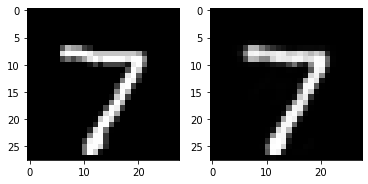

In [3]:
predict_images = model.predict(test_images)

# 绘制一个样本和预测结果
plt.subplot(1, 2, 1)
plt.imshow(test_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(predict_images[0], cmap=plt.get_cmap('gray'))
plt.show()

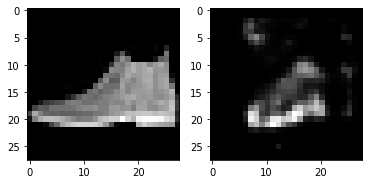

In [4]:
f_mnist = keras.datasets.fashion_mnist
(f_train_images, f_train_labels), (f_test_images, f_test_labels) = f_mnist.load_data()
f_train_images = f_train_images / 255.0
f_test_images = f_test_images / 255.0

f_predict_images = model.predict(f_test_images)
plt.subplot(1, 2, 1)
plt.imshow(f_test_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(f_predict_images[0], cmap=plt.get_cmap('gray'))
plt.show()

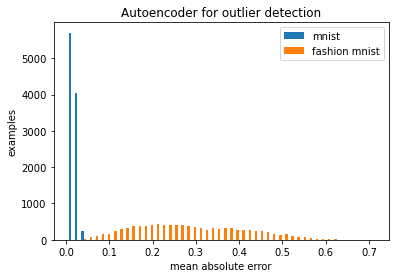

In [5]:
error = np.mean(np.abs(test_images - predict_images), (1, 2))
f_error = np.mean(np.abs(f_test_images, f_predict_images), (1, 2))
_ = plt.hist((error, f_error), bins=50, label=['mnist', 'fashion mnist'])

plt.legend()
plt.xlabel("mean absolute error")
plt.ylabel("examples")
plt.title("Autoencoder for outlier detection")
plt.show()

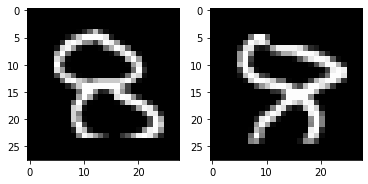

In [6]:
index = error.argmax()
plt.subplot(1, 2, 1)
plt.imshow(test_images[index], cmap=plt.get_cmap("gray"))
error[index] = 0
index = error.argmax()
plt.subplot(1, 2, 2)
plt.imshow(test_images[index], cmap=plt.get_cmap("gray"))
plt.show()